## Prepare data

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
train = pd.read_csv('train_small.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.dropna(subset=['type'], inplace=True)

In [4]:
test = pd.read_csv('labeled_output.csv')

In [5]:
test.dropna(subset=['text'], inplace=True)

In [6]:
test['category']=np.nan

In [7]:
X = train['text']
y = train['category']

In [8]:
y.shape

(259,)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
y_train.shape

(207,)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

e_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(e_name_mapping)

{'conv': 0, 'end': 1, 'mcq': 2, 'non mcq': 3, 'start': 4}


In [12]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(x_train)  # Don't cheat - fit only on training data
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test) 

## work with text data

In [13]:
# import nltk
# nltk.download()
# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer("english", ignore_stopwords=True)

# class StemmedCountVectorizer(CountVectorizer):
#     def build_analyzer(self):
#         analyzer = super(StemmedCountVectorizer, self).build_analyzer()
#         return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
# stemmed_count_vect.StemmedCountVectorizer(stop_words='english')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(analyzer='word',
                         min_df=1,
                         strip_accents='unicode',
                         token_pattern=r'\w{1,}',
                         ngram_range=(2,3),
                         stop_words='english'
                         )
x_train_vec = tf_vec.fit_transform(x_train)
x_test_vec = tf_vec.transform(x_test)

# SDG svm

In [15]:
from sklearn.linear_model import SGDClassifier as SGD

svm = SGD(shuffle=True,
          loss='hinge', 
          penalty='l2',
          alpha=1e-3, 
          max_iter=5, 
          random_state=42,
          )     

In [16]:
svm1 = svm.fit(x_train_vec, y_train)

In [17]:
svm_pred1 = svm1.predict(x_test_vec)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(svm_pred1, y_test))

0.6153846153846154


In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'max_iter': [2,5,10,50,100], 
    'loss': ['log','hinge'], 
    'penalty': ['l1','l2'],
    'learning_rate': ['optimal']
}

In [20]:
svm_cv = GridSearchCV(svm1, parameters, n_jobs=-1)
svm_cv= svm_cv.fit(x_train_vec, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [21]:
print(svm_cv.best_score_)
print(svm_cv.best_params_)

0.6521739130434783
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 5, 'penalty': 'l1'}


# fixing an unbalanced dataset

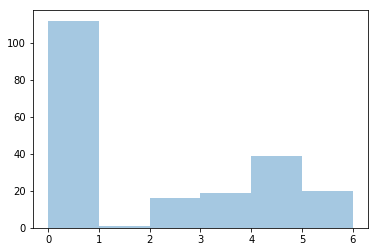

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(y_train, kde=False, bins=6)